<a href="https://colab.research.google.com/github/ashwinkrishna948/Gas_Mixture_Design_Experiment/blob/main/Gas_Mixture_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lattice Design (Fractional Compositions of A, B, C):
    ID     Location    A_frac    B_frac    C_frac
0    1       Vertex  0.153846  0.153846  0.692308
1    2       Vertex  0.153846  0.153846  0.692308
2    3       Vertex  0.153846  0.246154  0.600000
3    4       Vertex  0.153846  0.246154  0.600000
4    5       Vertex  0.246154  0.153846  0.600000
5    6       Vertex  0.246154  0.153846  0.600000
6    7       Vertex  0.246154  0.246154  0.507692
7    8       Vertex  0.246154  0.246154  0.507692
8    9  Center Edge  0.153846  0.200000  0.646154
9   10  Center Edge  0.200000  0.246154  0.553846
10  11  Center Edge  0.200000  0.153846  0.646154
11  12  Center Edge  0.246154  0.200000  0.553846
12  13  Check Blend  0.176923  0.176923  0.646154
13  14  Check Blend  0.223077  0.223077  0.553846
14  15     Centroid  0.200000  0.200000  0.600000


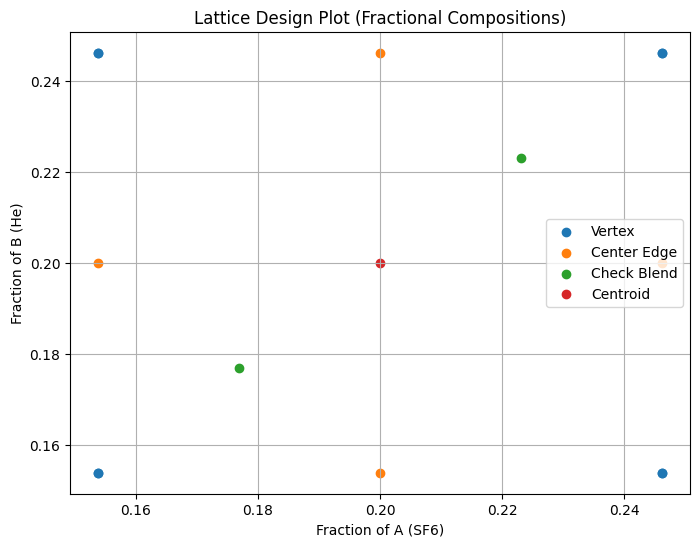

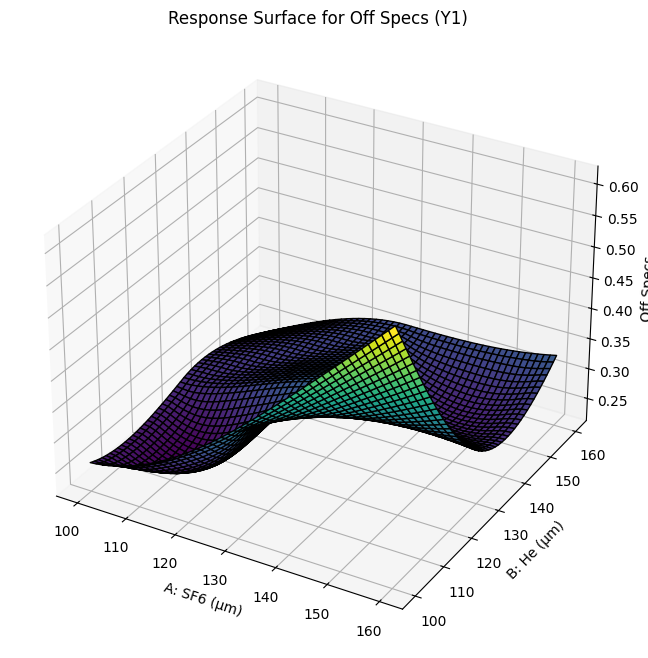

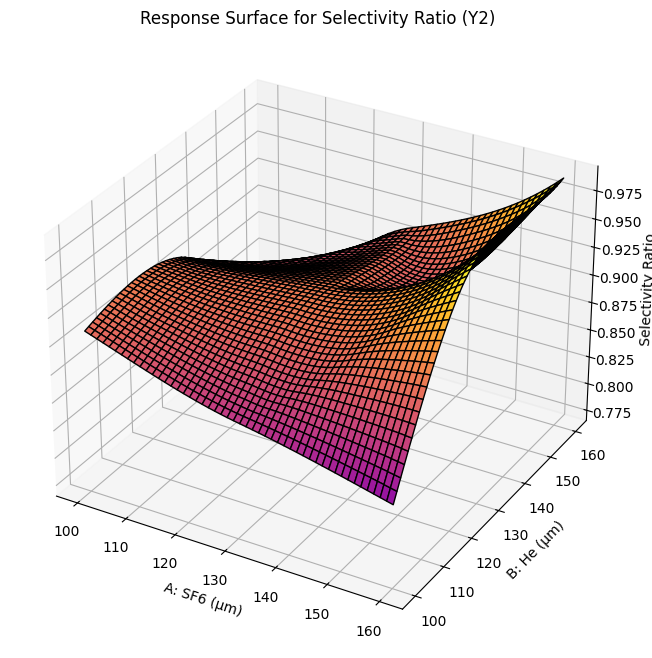

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Step 1: Define the table data
data = {
    'ID': range(1, 16),
    'Location': [
        'Vertex', 'Vertex', 'Vertex', 'Vertex', 'Vertex', 'Vertex', 'Vertex', 'Vertex',
        'Center Edge', 'Center Edge', 'Center Edge', 'Center Edge', 'Check Blend',
        'Check Blend', 'Centroid'
    ],
    'A_SF6': [100, 100, 100, 100, 160, 160, 160, 160, 100, 130, 130, 160, 115, 145, 130],
    'B_He': [100, 100, 160, 160, 100, 100, 160, 160, 130, 160, 100, 130, 115, 145, 130],
    'C_N2': [450, 450, 390, 390, 390, 390, 330, 330, 420, 360, 420, 360, 420, 360, 390],
    'Off_Specs': [0.26, 0.30, 0.23, 0.23, 0.62, 0.68, 0.33, 0.36, 0.27, 0.31, 0.39, 0.30, 0.23, 0.26, 0.34],
    'Selectivity_Ratio': [0.91, 0.88, 0.77, 0.76, 0.84, 0.87, 0.99, 1.02, 0.91, 0.91, 0.87, 0.99, 0.91, 0.91, 0.92]
}

# Convert data to a DataFrame for easier handling
df = pd.DataFrame(data)

# Step 2: Normalize the components for lattice design
# Convert each component to a fraction of the total (A + B + C)
df['A_frac'] = df['A_SF6'] / (df['A_SF6'] + df['B_He'] + df['C_N2'])
df['B_frac'] = df['B_He'] / (df['A_SF6'] + df['B_He'] + df['C_N2'])
df['C_frac'] = df['C_N2'] / (df['A_SF6'] + df['B_He'] + df['C_N2'])

# Output the lattice design with fractional compositions
print("Lattice Design (Fractional Compositions of A, B, C):")
print(df[['ID', 'Location', 'A_frac', 'B_frac', 'C_frac']])

# Step 3: Create the Lattice Design Plot (Ternary Plot Approximation)
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for the lattice points (Fractional compositions)
for location in df['Location'].unique():
    subset = df[df['Location'] == location]
    ax.scatter(subset['A_frac'], subset['B_frac'], label=location)

# Formatting the plot
ax.set_xlabel('Fraction of A (SF6)')
ax.set_ylabel('Fraction of B (He)')
ax.set_title('Lattice Design Plot (Fractional Compositions)')
ax.legend()
plt.grid(True)
plt.show()

# Step 4: Response Surface for Off Specs (Y1) and Selectivity Ratio (Y2)
# Prepare data for surface plotting
A = df['A_SF6']
B = df['B_He']
C = df['C_N2']
Y1 = df['Off_Specs']
Y2 = df['Selectivity_Ratio']

# Create grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(A.min(), A.max(), 50),
    np.linspace(B.min(), B.max(), 50)
)

# Interpolate response surfaces
grid_z1 = griddata((A, B), Y1, (grid_x, grid_y), method='cubic')
grid_z2 = griddata((A, B), Y2, (grid_x, grid_y), method='cubic')

# Plot Response Surface for Off Specs (Y1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z1, cmap='viridis', edgecolor='k')
ax.set_xlabel('A: SF6 (μm)')
ax.set_ylabel('B: He (μm)')
ax.set_zlabel('Off Specs')
ax.set_title('Response Surface for Off Specs (Y1)')
plt.show()

# Plot Response Surface for Selectivity Ratio (Y2)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z2, cmap='plasma', edgecolor='k')
ax.set_xlabel('A: SF6 (μm)')
ax.set_ylabel('B: He (μm)')
ax.set_zlabel('Selectivity Ratio')
ax.set_title('Response Surface for Selectivity Ratio (Y2)')
plt.show()
